# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import warnings
warnings.filterwarnings('ignore')

# Importing image folder

In [2]:
for dirname, _, filenames in os.walk('C:/Users/Public/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Public/archive\test\test\clean\04001.png
C:/Users/Public/archive\test\test\clean\04002.png
C:/Users/Public/archive\test\test\clean\04003.png
C:/Users/Public/archive\test\test\clean\04004.png
C:/Users/Public/archive\test\test\clean\04005.png
C:/Users/Public/archive\test\test\clean\04006.png
C:/Users/Public/archive\test\test\clean\04007.png
C:/Users/Public/archive\test\test\clean\04008.png
C:/Users/Public/archive\test\test\clean\04009.png
C:/Users/Public/archive\test\test\clean\04010.png
C:/Users/Public/archive\test\test\clean\04011.png
C:/Users/Public/archive\test\test\clean\04012.png
C:/Users/Public/archive\test\test\clean\04013.png
C:/Users/Public/archive\test\test\clean\04014.png
C:/Users/Public/archive\test\test\clean\04015.png
C:/Users/Public/archive\test\test\clean\04016.png
C:/Users/Public/archive\test\test\clean\04017.png
C:/Users/Public/archive\test\test\clean\04018.png
C:/Users/Public/archive\test\test\clean\04019.png
C:/Users/Public/archive\test\test\clean\04020.png


In [3]:
stego=os.listdir("C:/Users/Public/archive/train/train/stego")+os.listdir("C:/Users/Public/archive/test/test/stego")

In [4]:
len(stego)

18000

In [5]:
clean=os.listdir("C:/Users/Public/archive/train/train/clean")+os.listdir("C:/Users/Public/archive/test/test/clean")

In [6]:
len(clean)

6000

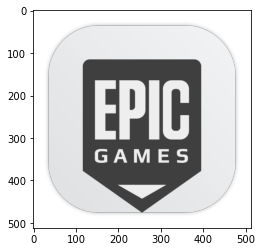

In [7]:
image1=Image.open("C:/Users/Public/archive/train/train/clean/00001.png")
plt.imshow(image1)

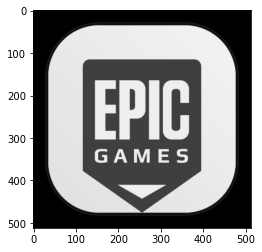

In [8]:
image2=Image.open("C:/Users/Public/archive/train/train/stego/image_00001_eth_0.png")
plt.imshow(image2)

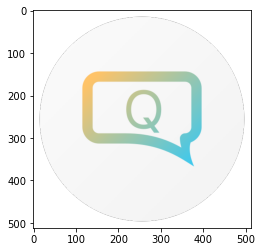

In [9]:
image3=Image.open("C:/Users/Public/archive/test/test/clean/04001.png")
plt.imshow(image3)

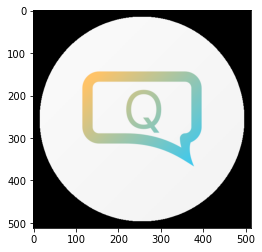

In [10]:
image4=Image.open("C:/Users/Public/archive/test/test/stego/image_04001_eth_0.png")
plt.imshow(image4)

In [11]:
def images_Loading(path):
    images=[]
    label=[]
    Folders=os.listdir(path)
    for i in Folders:
        sub_folders=os.listdir(path+'/'+i)
        for j in sub_folders[:9000]:
            every_img=Image.open(path+i+'/'+j)
            every_img=every_img.resize(size=(28,28))
            every_img=every_img.convert('L')
            images.append(np.array(every_img).flatten())
            label.append(i)
            del every_img
    return np.array(images),label 

# Train test image loading

In [12]:
X_train,y_train=images_Loading('C:/Users/Public/archive/train/train/')
y_train=pd.Series(y_train,dtype='category')

In [13]:
y_train.value_counts()

stego    9000
clean    4000
dtype: int64

In [14]:
X_train.shape

(13000, 784)

In [15]:
y_train=y_train.cat.codes

In [16]:
def images_Loading_test(path):
    images=[]
    label=[]
    Folders=os.listdir(path)
    for i in Folders:
        sub_folders=os.listdir(path+'/'+i)
        for j in sub_folders[:3000]:
            every_img=Image.open(path+i+'/'+j)
            every_img=every_img.resize(size=(28,28))
            every_img=every_img.convert('L')
            images.append(np.array(every_img).flatten())
            label.append(i)
            del every_img
    return np.array(images),label 

In [17]:
X_test,y_test=images_Loading_test('C:/Users/Public/archive/test/test/')

In [18]:
y_test=pd.Series(y_test,dtype='category')

In [19]:
y_test=y_test.cat.codes

In [20]:
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

In [21]:
X_train.shape

(13000, 28, 28)

In [22]:
X_test.shape

(5000, 28, 28)

In [23]:
# Define the Sequential model
cnn = tf.keras.Sequential()
# Add the first Conv2D layer
cnn.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                               input_shape=(28, 28, 1)))
# Add the first MaxPooling2D layer
cnn.add(tf.keras.layers.MaxPooling2D((2, 2), strides=2))
# Add the second Conv2D layer
cnn.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu))
# Add the second MaxPooling2D layer
cnn.add(tf.keras.layers.MaxPooling2D((2, 2), strides=2))
# Add the Dropout layer
cnn.add(tf.keras.layers.Dropout(0.5))
# Add the Flatten layer
cnn.add(tf.keras.layers.Flatten())
# Add the first Dense layer
cnn.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Add the output Dense layer
cnn.add(tf.keras.layers.Dense(9,  activation=tf.nn.softmax))

In [24]:
cnn.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# CNN summary

In [25]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [26]:
history=cnn.fit(X_train,y_train,epochs=10, validation_data = (X_test, y_test))

Epoch 1/10
407/407 [==============================] - 11s 23ms/step - loss: 0.5116 - accuracy: 0.8986 - val_loss: 0.0726 - val_accuracy: 0.9874
Epoch 2/10
407/407 [==============================] - 9s 22ms/step - loss: 0.0869 - accuracy: 0.9721 - val_loss: 0.0325 - val_accuracy: 0.9906
Epoch 3/10
407/407 [==============================] - 8s 20ms/step - loss: 0.0564 - accuracy: 0.9822 - val_loss: 0.0639 - val_accuracy: 0.9704
Epoch 4/10
407/407 [==============================] - 9s 22ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0184 - val_accuracy: 0.9932
Epoch 5/10
407/407 [==============================] - 10s 24ms/step - loss: 0.0408 - accuracy: 0.9888 - val_loss: 0.0171 - val_accuracy: 0.9950
Epoch 6/10
407/407 [==============================] - 9s 22ms/step - loss: 0.0319 - accuracy: 0.9908 - val_loss: 0.0193 - val_accuracy: 0.9954
Epoch 7/10
407/407 [==============================] - 8s 20ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.0166 - val_accuracy: 0.99

In [27]:
y_pred = cnn.predict(X_test)

157/157 [==============================] - 1s 6ms/step


In [28]:
y_pred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.6446560e-22, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.8154667e-14, 8.2818031e-35, ..., 2.0879509e-30,
        4.4188431e-30, 0.0000000e+00],
       ...,
       [1.7114247e-03, 9.9828857e-01, 4.8511251e-14, ..., 1.0608481e-11,
        8.7193734e-13, 9.4160553e-15],
       [1.6286483e-03, 9.9837142e-01, 4.0949994e-14, ..., 1.0080480e-11,
        7.5845661e-13, 7.7653389e-15],
       [1.5537982e-03, 9.9844629e-01, 2.8412194e-14, ..., 8.0623954e-12,
        5.9264491e-13, 5.7120501e-15]], dtype=float32)

In [29]:
cnn.evaluate(X_test , y_test)

157/157 [==============================] - 1s 6ms/step - loss: 0.0190 - accuracy: 0.9946


[0.018995342776179314, 0.9945999979972839]

In [30]:
y_pred=np.argmax(y_pred,axis=1)

In [31]:
acc_cnn=accuracy_score(y_pred,y_test)

# CNN accuracy 

In [32]:
acc_cnn

0.9946

# Confusion matrix

In [33]:
cm = confusion_matrix(y_test, y_pred)

In [34]:
cm

array([[1994,    6],
       [  21, 2979]], dtype=int64)

# Heatmap 

<AxesSubplot:>

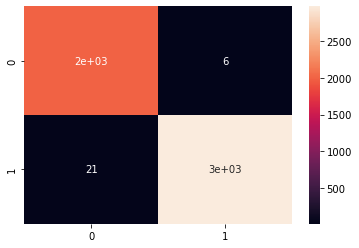

In [35]:
sns.heatmap(cm,annot=True)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2000
           1       1.00      0.99      1.00      3000

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

# Traning and validation accuracy 

Text(0.5, 1.0, 'Training and Validation Accuracy')

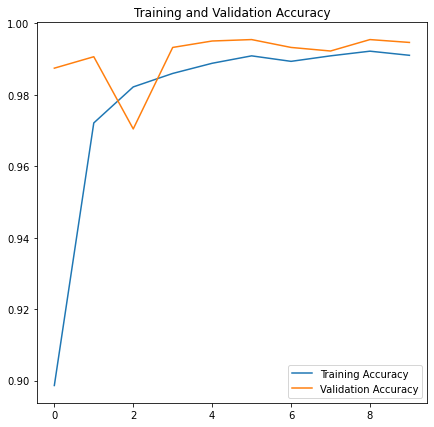

In [39]:
plt.figure(figsize=(7, 7))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

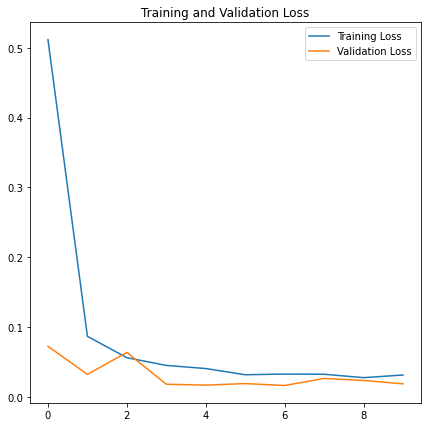

In [40]:
plt.figure(figsize=(7, 7))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()